In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Conv1DTranspose
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt

# beginning of the url to data
small_noise = 'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv'

# read data without anomalies into a datafarme
df_small_noise = pd.read_csv(small_noise, parse_dates = True, index_col = "timestamp")

# read data with anomalies into a dataframe
daily_jumpsup = 'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv'
df_daily_jumpsup = pd.read_csv(daily_jumpsup, parse_dates = True, index_col = "timestamp")

In [2]:
df_small_noise

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120
...,...
2014-04-14 23:35:00,20.211195
2014-04-14 23:40:00,20.531041
2014-04-14 23:45:00,19.032127


In [3]:
df_daily_jumpsup

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739
...,...
2014-04-14 23:35:00,18.074649
2014-04-14 23:40:00,21.002014
2014-04-14 23:45:00,20.566713


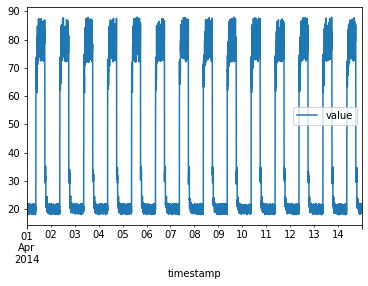

In [4]:
df_small_noise.plot()

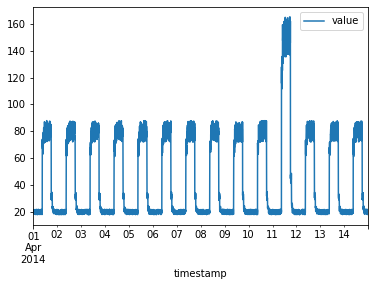

In [5]:
df_daily_jumpsup.plot()

In [7]:
timeSteps = 288

def create_sequences(values, steps = timeSteps):
    output = []
    for i in range(len(values) - steps):
        output.append(values[i : (i + steps)])
        
    return np.stack(output)

trainX = create_sequences(df_small_noise.values)
testX = create_sequences(df_daily_jumpsup.values)

print(trainX.shape)
print(testX.shape)

(3744, 288, 1)
(3744, 288, 1)


In [9]:
model = Sequential()

model.add(Input(shape = (trainX.shape[1], trainX.shape[2])))

model.add(Conv1D(32, 7, padding = 'same', strides = 2, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Conv1D(16, 7, padding = 'same', strides = 2, activation = 'relu'))

# print activations here if we want the latent representation

model.add(Conv1DTranspose(16, 7, padding = 'same', strides = 2, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Conv1DTranspose(32, 7, padding = 'same', strides = 2, activation = 'relu'))

model.add(Conv1DTranspose(1, 7, padding = 'same'))

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 144, 32)           256       
_________________________________________________________________
dropout (Dropout)            (None, 144, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 72, 16)            3600      
_________________________________________________________________
conv1d_transpose (Conv1DTran (None, 144, 16)           1808      
_________________________________________________________________
dropout_1 (Dropout)          (None, 144, 16)           0         
_________________________________________________________________
conv1d_transpose_1 (Conv1DTr (None, 288, 32)           3616      
_________________________________________________________________
conv1d_transpose_2 (Conv1DTr (None, 288, 1)            2

In [10]:
H = model.fit(trainX, trainX, epochs = 50, batch_size = 128, validation_split = 0.1)

Epoch 1/50
27/27 [==============================] - 7s 179ms/step - loss: 1663.5936 - val_loss: 174.4930
Epoch 2/50
27/27 [==============================] - 3s 106ms/step - loss: 159.8147 - val_loss: 78.7410
Epoch 3/50
27/27 [==============================] - 3s 103ms/step - loss: 99.6568 - val_loss: 60.6761
Epoch 4/50
27/27 [==============================] - 3s 103ms/step - loss: 84.6894 - val_loss: 57.8485
Epoch 5/50
27/27 [==============================] - 3s 114ms/step - loss: 70.2409 - val_loss: 52.3140
Epoch 6/50
27/27 [==============================] - 3s 107ms/step - loss: 57.5190 - val_loss: 53.6511
Epoch 7/50
27/27 [==============================] - 2s 90ms/step - loss: 49.5480 - val_loss: 48.8596
Epoch 8/50
27/27 [==============================] - 3s 101ms/step - loss: 43.5575 - val_loss: 43.0727
Epoch 9/50
27/27 [==============================] - 3s 97ms/step - loss: 39.2360 - val_loss: 42.9834
Epoch 10/50
27/27 [==============================] - 3s 101ms/step - loss: 36.37

In [ ]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")

# import the necessary packages
import cv2
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as Backend
import numpy as np